# Approach
303的拓展，建一个prefixSum数组，prefixSum[i][j]表示以matrix[0][0]为左上顶点，matrix[i][j]为右下顶点的矩形区域的元素和，因此以matrix[row1][col1]为左上顶点，matrix[row2][col2]为右下顶点的矩形区域的元素和prefixSum[row2][col2]-prefixSum[row2][col1-1]- prefixSum[row1-1][col2]+prefixSum[row1-1][col1-1]！如下图所示：
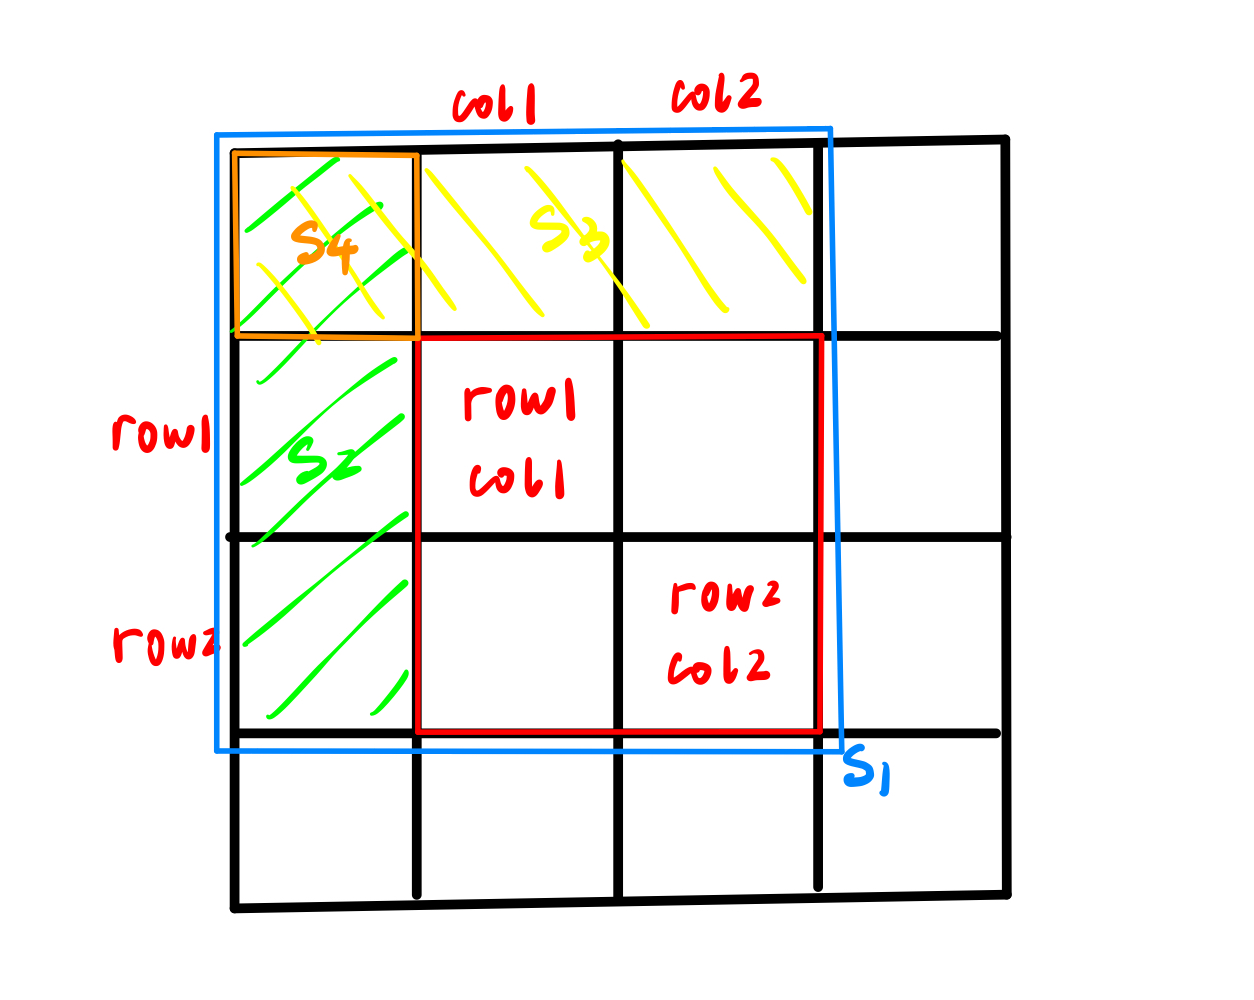

注意边界情况，当row1或col1为0时，prefixSum[row2][col1-1]，prefixSum[row1-1][col2]，prefixSum[row1-1][col1-1]这三部分表示的矩形区域不存在！因此这三部分的区域和为0！！！      

用上述前缀和的方法求区域和的话，我们只会在init中用O(n^2)的时间求prefixSum数组，但是每次调用sumRegion求区域和时，所用时间都是O(1)！！！ 

本题比303复杂不少，前缀和的应用从一维数组拓展到了二维矩阵，因此前缀和的定义以及求区域和(303一维数组中是求区间和)的方法都发生了改变！   

# Note
前缀和技巧适用于快速、频繁地计算一个索引区间内的元素之和(subarray sum)。本质上是在一个list当中，用O(N)的时间提前算好从第0个数字到第i个数字之和，在后续使用中可以在O(1)时间内计算出第i到第j个数字之和。

# Code

In [ ]:
class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        self.prefixSum = [[0] * len(matrix[0]) for _ in range(len(matrix))]
        for i in range(len(matrix)):
            # 用来累和每一行的元素，原理类同303代码中的sum_
            sum_ = 0
            for j in range(len(matrix[0])):
                sum_ += matrix[i][j]
                # sum_表示当前行中matrix[i][j]及其左边的元素和，即matrix[i][0]+...+matrix[i][j]
                # self.prefixSum[i-1][j]表示以matrix[0][0]为左上顶点，matrix[i-1][j]为右下顶点的矩形区域的元素和
                # 上述二者相加就是以matrix[0][0]为左上顶点，matrix[i][j]为右下顶点的矩形区域的元素和！
                self.prefixSum[i][j] = sum_ + self.prefixSum[i - 1][j]

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        s1 = self.prefixSum[row2][col2]
        s2 = self.prefixSum[row2][col1 -1] if col1 > 0 else 0
        s3 = self.prefixSum[row1 - 1][col2] if row1 > 0 else 0
        s4 = self.prefixSum[row1 - 1][col1 - 1] if row1 > 0 and col1 > 0 else 0
        return s1 - s2 - s3 + s4